Data: https://data.dhsgis.wi.gov/datasets/covid-19-historical-data-by-county-1/explore

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("COVID-19_Historical_Data_by_County.csv")
df.head()
# print(df.columns)
df = df[[ "NAME", "DATE","POS_7DAYAVG", "DTH_NEW" ]]
df = df.dropna()
# print(df.POS_7DAYAVG)

#Count how many NAN values in the data frame?

df["DATE"] = pd.to_datetime(df["DATE"]).dt.date 
df = df.replace(-999,0)
df


In [ ]:
deaths = df[["NAME","DATE","DTH_NEW"]].copy()
deaths["DATE"] = deaths["DATE"] - pd.Timedelta(days=14)
deaths = deaths.set_index(deaths["NAME"] + "_" + deaths["DATE"].astype(str)) #name and date mile indexing korlam

df = df.set_index(df["NAME"] + "_" + df["DATE"].astype(str))
df


In [5]:
df["DTH_NEW_2WK"] = deaths["DTH_NEW"]
df = df.dropna()
df.head()


,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
Adams_2020-03-16,Adams,2020-03-16,0.0,0.0,0.0
Ashland_2020-03-16,Ashland,2020-03-16,0.0,0.0,0.0
Barron_2020-03-16,Barron,2020-03-16,0.0,0.0,0.0
Bayfield_2020-03-16,Bayfield,2020-03-16,0.0,0.0,0.0
Brown_2020-03-16,Brown,2020-03-16,0.0,0.0,0.0


In [6]:
df.to_csv("wi-covid.csv", index=False)
df.mean()

POS_7DAYAVG    17.325702
DTH_NEW         0.208192
DTH_NEW_2WK     0.209517
dtype: float64

In [7]:
plt.rcParams["font.size"] = 16

In [8]:
df = pd.read_csv("wi-covid.csv")
df.tail()
df.mean()

POS_7DAYAVG    17.325702
DTH_NEW         0.208192
DTH_NEW_2WK     0.209517
dtype: float64

In [ ]:
df.plot.scatter(x="DTH_NEW", y="DTH_NEW_2WK", alpha=0.2) #alpha use for transperancy

In [ ]:
df.plot.scatter(x="POS_7DAYAVG", y="DTH_NEW_2WK")

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression() #methods: fit, score, predict

In [13]:
X = df[["DTH_NEW"]] # x values (must be a DataFrame)

In [14]:
y = df["DTH_NEW_2WK"] # y values (can be a Series)

In [15]:
lr.fit(X,y) #fit means training.
lr.score(X,y) #how much the variance is explained by the model

0.07372663434222382

In [16]:
lr.fit(df[["POS_7DAYAVG"]], df['DTH_NEW_2WK']) 
lr.score(df[["POS_7DAYAVG"]], df['DTH_NEW_2WK'])

0.15289496422699078

In [17]:
lr.predict([[10]])

array([0.14146398])

In [ ]:
fit_df = pd.DataFrame({"DTH_NEW" : range(0,500)})
fit_df
lr.predict(fit_df) #kichu random value generate kore ogula diye predict korlam

fit_df["PREDICTED_DTH_NEW_2WK"]=lr.predict(fit_df) #predicted val gula new col e insert korlam
fit_df


In [ ]:
fit_df.plot.line(x="DTH_NEW", y="PREDICTED_DTH_NEW_2WK", color="red" )
df.plot.scatter(x="DTH_NEW", y="DTH_NEW_2WK", color="red")



In [ ]:
ax = fit_df.plot.line(x="DTH_NEW", y="PREDICTED_DTH_NEW_2WK", color="red" )
df.plot.scatter(x="DTH_NEW", y="DTH_NEW_2WK", color="blue", ax=ax,alpha=0.2)

In [21]:
df["DTH_NEW_2WK"].var() #Variance . How much differ form the average value.

1.360496557381923

In [22]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1)

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
lr = LinearRegression()
# lr.fit(train_df[LIST OF COLUMNS], train_df[Y_COLUMN])
# lr.score(test_df[LIST OF COLUMNS], test_df[Y_COLUMN])

lr.fit(train_df[["POS_7DAYAVG"]], train_df["DTH_NEW_2WK"])
lr.score(test_df[["POS_7DAYAVG"]], test_df["DTH_NEW_2WK"])

In [ ]:
lr.score(train_df[["POS_7DAYAVG"]], train_df["DTH_NEW_2WK"])


In [ ]:
train_df["DTH_NEW_2WK"].var(), test_df["DTH_NEW_2WK"].var()

#How variance is related to score??

**Error Functions**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
#r2_score , MAE these are metrics
# METRICS(TRUE values, Predicted values)

r2_score(test_df["DTH_NEW_2WK"], lr.predict(test_df[["POS_7DAYAVG"]])) #True value holo y er test. predict value holo x er test. 


**sklearn Pipleline**

In [32]:
train_df, test_df = train_test_split(df)
len(train_df), len(test_df)
df.tail()

,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
35491,Richland,2021-07-21,0.43,0.0,0.0
35492,Eau Claire,2021-07-21,4.14,0.0,0.0
35493,Florence,2021-07-21,0.14,0.0,0.0
35494,Clark,2021-07-21,2.43,0.0,0.0
35495,Fond du Lac,2021-07-21,2.71,0.0,0.0


In [39]:
from sklearn.model_selection import cross_val_score 

m1 = LinearRegression()
# m1.fit(train_df[LIST OF FEATURES], train_df[YCOL])
m1.fit(train_df[["DTH_NEW"]], train_df["POS_7DAYAVG"])
m1.predict(test_df[["DTH_NEW"]])
cross_val_score(m1,train_df[["DTH_NEW"]],train_df["POS_7DAYAVG"] )

array([0.19034537, 0.1811929 , 0.07129429, 0.15571918, 0.18344343])

In [66]:
m1 = LinearRegression()
# m1.fit(train_df[LIST OF FEATURES], train_df[YCOL])
m1.fit(train_df[["DTH_NEW", "DTH_NEW_2WK" ]], train_df["POS_7DAYAVG"]) #******** Multiple X values.
m1.predict(test_df[["DTH_NEW", "DTH_NEW_2WK" ]])
score = cross_val_score(m1,train_df[["DTH_NEW", "DTH_NEW_2WK" ]],train_df["POS_7DAYAVG"] )
score.mean()

0.21509639942530692

In [ ]:
demo = train_df[["DTH_NEW"]]+2
demo["DTH_NEW_squared"] = demo["DTH_NEW"]**2
demo["DTH_NEW_cubic"] = demo["DTH_NEW"]**3
demo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer

poly = PolynomialFeatures(degree=4, include_bias=False)
data = poly.fit_transform(train_df[["DTH_NEW"]])
pd.DataFrame(data, columns=poly.get_feature_names(["DTH_NEW"])) #****** Numpy array to pandas dataframe



In [68]:
# m2 = Pipeline(
#     [
    
#     1 or more transformer
#      estimator
#     ]
# )

# This process will improve the model score
m2 = Pipeline([
               ("poly", PolynomialFeatures(degree=2, include_bias=False)),
               ("lr", LinearRegression())
])
m2.fit(train_df[["DTH_NEW", "DTH_NEW_2WK" ]], train_df["POS_7DAYAVG"]) #******** Multiple X values.
score = cross_val_score(m2,train_df[["DTH_NEW", "DTH_NEW_2WK" ]],train_df["POS_7DAYAVG"], cv=10 )
score.mean()

-0.13430824517461523

**Logistic Regression**
(Iris dataset)

In [ ]:
df = pd.read_csv("Iris.csv")
df.insert(2, "const", 1)
df.tail()

In [106]:
xcols = ["SepalLengthCm", "SepalWidthCm", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test = test.copy() #Slice error dekhabe na

reg = LinearRegression()
reg.fit(train[xcols], train["SepalWidthCm"])
test["prediction"] = reg.predict(test[xcols])
test



,Id,SepalLengthCm,const,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction
82,83,5.8,1,2.7,3.9,1.2,Iris-versicolor,2.7
134,135,6.1,1,2.6,5.6,1.4,Iris-virginica,2.6
114,115,5.8,1,2.8,5.1,2.4,Iris-virginica,2.8
42,43,4.4,1,3.2,1.3,0.2,Iris-setosa,3.2
109,110,7.2,1,3.6,6.1,2.5,Iris-virginica,3.6
57,58,4.9,1,2.4,3.3,1.0,Iris-versicolor,2.4
1,2,4.9,1,3.0,1.4,0.2,Iris-setosa,3.0
70,71,5.9,1,3.2,4.8,1.8,Iris-versicolor,3.2
25,26,5.0,1,3.0,1.6,0.2,Iris-setosa,3.0
84,85,5.4,1,3.0,4.5,1.5,Iris-versicolor,3.0


In [ ]:

reg = LinearRegression()
reg.fit(train[xcols], train["SepalWidthCm"])
test["prediction"] = reg.predict(test[xcols]) #***Very important. evabe onk gula col er opor depend kore amra j kono akta feature k predict krte parbo.

# test["prob"] = reg.predict_proba(test[xcols]) [:,1] #we can use it for logistic regression.
test


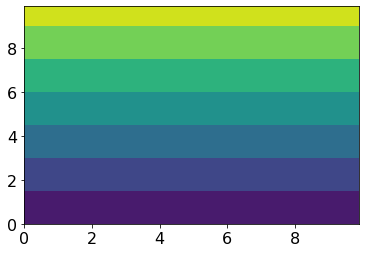

In [105]:
#create arrays in form of contourf later
sepw, sep1 = np.meshgrid(np.arange(0,10,0.1),np.arange(0,10,0.1))
plt.contourf(sepw,sep2,sep2)
cdf = pd.DataFrame({
    'SepalLengthCm': sep1.reshape(-1),
    'SepalWidthCm' : sepw.reshape(-1),
    'const' :1
})

cdf["prediction"] = reg.predict(cdf)


In [ ]:
ax = plt.contourf(sepw, sep1, cdf["prediction"].values.reshape(sepw.shape))

#**Same graph er moddhei 2 ta scatter plot kora jay. 